In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# !pip install matplotlib

<h2>Importing the data</h2>

In [2]:
train = pd.read_csv("train_dr.csv")
test = pd.read_csv("Desktop/test.csv/test.csv")
train.head()
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


<h2>Cleaning the data</h2>

In [3]:
#calculating the percentage of missing data
missing = train.isnull().sum()
print("Null columns: ")
print(missing)
percent_miss = (missing/train.isnull().count())*100
missing_val = pd.concat([missing,percent_miss],axis=1,keys=['Total','Percent'])
print(missing_val)

Null columns: 
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64
                             Total    Percent
User_ID                          0   0.000000
Product_ID                       0   0.000000
Gender                           0   0.000000
Age                              0   0.000000
Occupation                       0   0.000000
City_Category                    0   0.000000
Stay_In_Current_City_Years       0   0.000000
Marital_Status                   0   0.000000
Product_Category_1               0   0.000000
Product_Category_2          173638  31.566643
Product_Category_3    

In [4]:
#calculating the percentage of missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
impu_2 = imputer.fit_transform(test[['Product_Category_2']])
test['Product_Category_2'] = np.round(impu_2)
impu_3 = imputer.fit_transform(test[['Product_Category_3']])
test['Product_Category_3'] = np.round(impu_3)
print("Null columns: ")
print(test.isnull().sum())
test.describe(include='all')

Null columns: 
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,2.335990e+05,233599,233599,233599,233599.000000,233599,233599,233599.000000,233599.000000,233599.000000,233599.000000
unique,NaN,3491,2,7,NaN,3,5,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN
freq,NaN,829,175772,93428,NaN,98566,82604,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.085407,NaN,NaN,0.410070,5.276542,9.896168,12.899482
std,1.726505e+03,NaN,NaN,NaN,6.521146,NaN,NaN,0.491847,3.736380,4.233686,2.280320
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000
25%,1.001527e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,8.000000,13.000000
50%,1.003070e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,10.000000,13.000000
75%,1.004477e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,14.000000,13.000000


In [5]:
#dropping columns that are not necessary
train1 = train.drop(['User_ID', 'Product_ID'],axis=1)
#replacing NaN with mean values in their respective columns
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer_2 = imputer.fit_transform(train1[['Product_Category_2']])
train['Product_Category_2'] = np.round(imputer_2)
imputer_3 = imputer.fit_transform(train1[['Product_Category_3']])
train['Product_Category_3'] = np.round(imputer_3)
print("Null columns: ")
print(train.isnull().sum())
train.describe(include='all')

Null columns: 
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.892101,12.899387,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,4.208490,2.276942,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,8.000000,13.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,10.000000,13.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,14.000000,13.000000,12054.000000


In [6]:
train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

<!--
# # a=list(train.Occupation.unique())
# # a.sort()
# a = train.Occupation.value_counts()
# # a=pd.DataFrame(a)
# train.Occupation.sort_values().unique()
# train.corr()
-->

<!--
# labels = []
# values = []

# for uniqueOccupationValue in train['Occupation'].sort_values().unique():
#     OccPurchaserData = train.loc[train['Occupation'] == uniqueOccupationValue]
#     OccPurchaserMean = np.mean(OccPurchaserData['Purchase'])
#     labels.append(uniqueOccupationValue)
#     values.append(OccPurchaserMean)
    
# gy= list(train.Purchase)
# yu= []
# for i in iterrows(gy):
#     a = i/max(a)
#     yu.append(a)

# plt.bar(yu,values, width=.9, facecolor='b', edgecolor='w', alpha=.5)
# plt.text(-1,10800,'Average purchase in black friday based on Occupation')
-->

In [7]:
# bins = np.linspace(min(train['Occupation']), max(train['Occupation']), 20)
# grp_names = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19']
# train['Occupation_binned'] = pd.cut(train['Occupation'], bins, labels=grp_names, include_lowest=True )
# train[['Occupation','Occupation_binned']]
# a = train['Age'].unique()

bins = ['0','17','25','35','45','50','55','60']
bin_1 = ['17','25','35','45','50','55','60']
grp_names = ['teens','milleanials','thirties','forties','fifties','middle-aged','old']
train['Age_binned'] = pd.cut(train['Age'], bins, labels = grp_names, include_lowest= True)
train[['Age','Age_binned']].head(30)
train['Age_binned_test'] = pd.cut(train['Age'], bins, labels = bin_1, include_lowest= True)
train['Age_binned_test']=train['Age_binned_test'].cat.codes
train[['Age','Age_binned_test']].head(10)
train[['Purchase', 'Occupation']].corr()

,Purchase,Occupation
Purchase,1.000000,0.020833
Occupation,0.020833,1.000000


<h2>Analysing the data(for task Occupation vs Purchase)</h2>

In [8]:
# a=np.corrcoef(train.Purchase,train.Age_binned_test)
a4_dims = (22, 10)
fig, ax = pyplot.subplots(figsize=a4_dims)
# train[['Purchase','Occupation']].corr()
sns.boxplot(y='Purchase', x='Occupation',ax=ax,data=train,width=0.5,palette="colorblind")
plt.text(8,25500,"Occupations VS Purchase")

NameError: name 'pyplot' is not defined

<h2>Model development (for task Occupation vs Purchase)</h2>

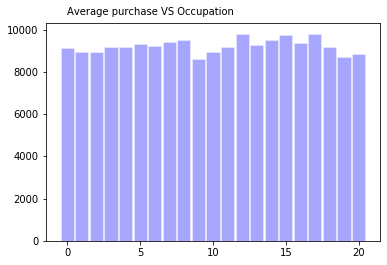

In [9]:
l = []
v = []

for i in train['Occupation'].sort_values().unique():
    O = train.loc[train['Occupation'] == i]
    op = np.mean(O['Purchase'])
    l.append(i)
    v.append(op)
    
plt.bar(l,v, width=0.9, facecolor='b', edgecolor='w', alpha=0.35)
plt.text(0,10700,'Average purchase VS Occupation')
         
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X=train[['Occupation']]
Y=train[['Purchase']]
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

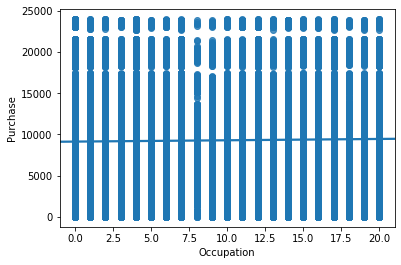

In [11]:
sns.regplot(x="Occupation", y="Purchase", data=train)

In [13]:
class Plotpolly:
    def PlotPolly(model, independent_variable, dependent_variabble, Name):
        x_new = np.linspace(0, 20, 100)
        y_new = model(x_new)

        plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
        plt.title('Polynomial Fit with Matplotlib for Occupation ~ Purchase')
        ax = plt.gca()
        ax.set_facecolor((0.898, 0.898, 0.898))
        fig = plt.gcf()
        plt.xlabel(Name)
        plt.ylabel('Purchase')
    
        plt.show()
        plt.close()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


           33             32             31             30
5.128e-34 x  - 1.171e-32 x  - 2.097e-31 x  - 2.094e-31 x 
              29             28             27             26
 + 6.717e-29 x  + 1.809e-27 x  + 2.419e-26 x  - 1.842e-26 x 
              25             24             23             22
 - 1.029e-23 x  - 3.006e-22 x  - 4.788e-21 x  - 1.811e-20 x 
              21             20             19            18
 + 1.491e-18 x  + 5.219e-17 x  + 8.866e-16 x  + 2.74e-15 x 
              17             16            15             14
 - 3.116e-13 x  - 9.548e-12 x  - 1.05e-10 x  + 1.741e-09 x 
              13             12             11             10
 + 8.422e-08 x  + 8.144e-07 x  - 2.489e-05 x  - 0.0006361 x 
             9          8       7         6         5        4        3
 + 0.007635 x + 0.2616 x - 6.6 x + 65.55 x - 352.4 x + 1086 x - 1893 x
         2
 + 1805 x - 877.2 x + 9125


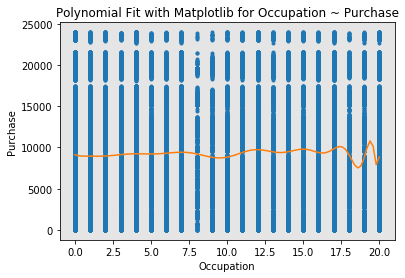

In [15]:
x=train['Occupation']
y=train['Purchase']
f = np.polyfit(x, y, 33)
P_33 = np.poly1d(f)
print(P_33)
Plotpolly.PlotPolly(P_33,x,y,'Occupation')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


           80             79             78            77
1.382e-95 x  + 2.279e-94 x  + 3.612e-93 x  + 5.39e-92 x 
              76             75             74             73
 + 7.253e-91 x  + 7.788e-90 x  + 2.928e-89 x  - 1.763e-87 x 
              72            71             70             69
 - 7.817e-86 x  - 2.33e-84 x  - 5.995e-83 x  - 1.422e-81 x 
              68             67             66             65
 - 3.196e-80 x  - 6.898e-79 x  - 1.439e-77 x  - 2.909e-76 x 
              64             63            62             61
 - 5.706e-75 x  - 1.083e-73 x  - 1.98e-72 x  - 3.456e-71 x 
              60             59             58             57
 - 5.652e-70 x  - 8.342e-69 x  - 1.002e-67 x  - 5.557e-67 x 
              56         55             54             53
 + 1.925e-65 x  + 1e-63 x  + 3.202e-62 x  + 8.648e-61 x 
              52             51             50             49
 + 2.125e-59 x  + 4.894e-58 x  + 1.069e-56 x  + 2.225e-55 x 
              48             47     

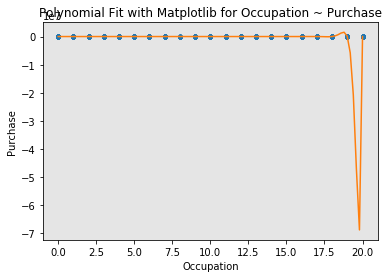

In [16]:
x=train['Occupation']
y=train['Purchase']
f = np.polyfit(x, y, 80)
P_80 = np.poly1d(f)
print(P_80)
Plotpolly.PlotPolly(P_80,x,y,'Occupation')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


           50             49             48             47
5.948e-56 x  + 2.366e-55 x  - 7.667e-54 x  - 2.848e-52 x 
              46             45            44             43
 - 6.388e-51 x  - 1.115e-49 x  - 1.49e-48 x  - 1.042e-47 x 
              42             41             40             39
 + 1.976e-46 x  + 1.113e-44 x  + 3.259e-43 x  + 7.476e-42 x 
              38             37             36             35
 + 1.437e-40 x  + 2.271e-39 x  + 2.546e-38 x  + 1.356e-38 x 
              34             33             32             31
 - 9.917e-36 x  - 3.707e-34 x  - 9.535e-33 x  - 1.961e-31 x 
              30             29             28             27
 - 3.205e-30 x  - 3.492e-29 x  + 7.379e-29 x  + 1.723e-26 x 
              26            25             24             23
 + 5.822e-25 x  + 1.33e-23 x  + 2.193e-22 x  + 1.954e-21 x 
              22             21             20             19
 - 2.606e-20 x  - 1.686e-18 x  - 4.377e-17 x  - 6.732e-16 x 
              18          

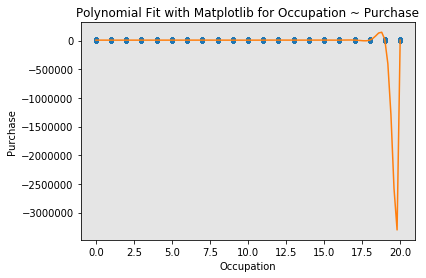

In [204]:
x=train['Occupation']
y=train['Purchase']
f = np.polyfit(x, y, 50)
P_50 = np.poly1d(f)
print(P_50)
PlotPolly(P_50,x,y,'Occupation')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


           34             33             32             31
2.599e-35 x  - 5.079e-34 x  - 1.077e-32 x  - 5.358e-32 x 
              30             29             28             27
 + 2.382e-30 x  + 8.292e-29 x  + 1.446e-27 x  + 1.019e-26 x 
              26             25            24             23
 - 2.702e-25 x  - 1.243e-23 x  - 2.73e-22 x  - 3.275e-21 x 
              22             21             20             19
 + 1.376e-20 x  + 1.816e-18 x  + 4.926e-17 x  + 6.876e-16 x 
              18             17            16           15
 - 1.318e-15 x  - 3.375e-13 x  - 8.61e-12 x  - 7.4e-11 x 
              14             13            12             11
 + 2.017e-09 x  + 7.716e-08 x  + 5.96e-07 x  - 2.473e-05 x 
              10            9          8         7         6         5
 - 0.0005487 x  + 0.007695 x + 0.2267 x - 6.029 x + 60.99 x - 331.3 x
         4        3        2
 + 1028 x - 1800 x + 1727 x - 851.7 x + 9125


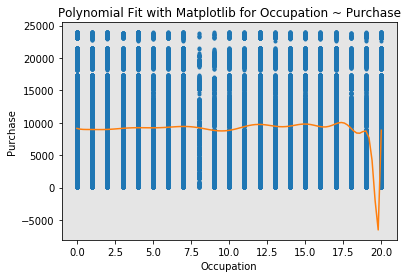

In [17]:
x=train['Occupation']
y=train['Purchase']
f = np.polyfit(x, y, 34)
P_34 = np.poly1d(f)
print(P_34)
Plotpolly.PlotPolly(P_34,x,y,'Occupation')

<h2>Model evaluation(for task Occupation vs Purchase)</h2>

In [206]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [29]:
lr = LinearRegression()
X=train[['Occupation']]
Y=train[['Purchase']]
lr.fit(X,Y)
print("The R squared is -", lr.score(X,Y))
MSE_lr = mean_squared_error(Y,lr.predict(X))
print("MSE :", MSE_lr)

The R squared is - 0.00043399792792742087
MSE : 25220189.81887091


In [227]:
r_squared = r2_score(y, P_33(x))
print('The R-square value for degree 33 is: ', r_squared)
MSE=mean_squared_error(train['Purchase'], P_33(x))
print('MSE :',MSE)

The R-square value for degree 33 is:  0.003453135208523417
MSE : 25144013.543219257


In [229]:
r_squared = r2_score(y, P_80(x))
print('The R-square value for degree 80 is: ', r_squared)
MSE=mean_squared_error(train['Purchase'], P_80(x))
print('MSE :',MSE)

The R-square value for degree 80 is:  0.00347712036813963
MSE : 25143408.370297108


In [208]:
r_squared = r2_score(y, P_50(x))
print('The R-square value for degree 50 is: ', r_squared)
MSE=mean_squared_error(train['Purchase'], P_50(x))
print('MSE :',MSE)

The R-square value for degree 50 is:  0.0034718938622896323
MSE : 25143540.240998346


In [211]:
r_squared = r2_score(y, P_34(x))
print('The R-square value for degree 34 is: ', r_squared)
MSE=mean_squared_error(train['Purchase'], P_34(x))
print('MSE :',MSE)

The R-square value for degree 34 is:  0.0034540821748000328
MSE : 25143989.65018048


<h2>Analysis and preperation (for Dwellers vs Purchase, grouped by city and product)</h2>

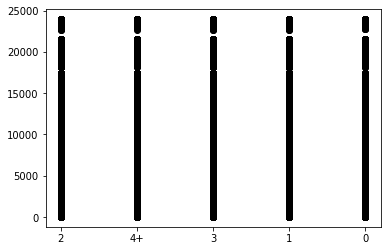

In [319]:
a=train[['Stay_In_Current_City_Years']]
d=train['Stay_In_Current_City_Years']
c = d.sort_values().unique()

def dwellers(var):
    r = {}
    col = train[var]
    for entry in col:
        if entry in r.keys():
            r[entry]+=1
        else:
            r[entry]=1
    return r
count = dwellers('Stay_In_Current_City_Years')
# count = pd.Series(count)
# count = pd.DataFrame(count)
Settlers = count['1']+count['2']+count['3']
Migrants = count['0']
Locals = count['4+']
fg = [Locals,Migrants,Settlers]
plt.plot(d,train['Purchase'],'o',color='black')
plt.show()

Trying to find an overall trend, if any.


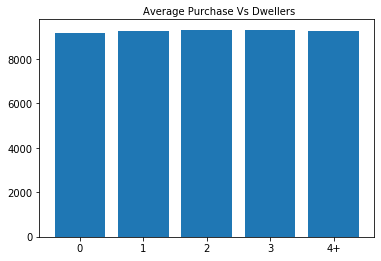

In [223]:
l = []
v = []


for i in train['Stay_In_Current_City_Years'].sort_values().unique():
    cp = train.loc[train['Stay_In_Current_City_Years'] == i]
    cp_mean = np.mean(cp['Purchase'])
    l.append(i)
    v.append(cp_mean)
    
print("Trying to find an overall trend, if any.")
    
plt.bar(l,v)
plt.text(1,10000, "Average Purchase Vs Dwellers")
plt.show()

<!--
# print("Purchases values for Product 1 - ")
# CG_1 = Product_1.groupby(['City_Category'])
# CG_1_A = CG_1.get_group('A')
# plt.subplot(2,2,1)
# a=CG_1_A['Stay_In_Current_City_Years'].sort_values()
# b=CG_1_A['Purchase']
# plt.bar(a,b)
# plt.text(2,28000,'City A')
# plt.show()

# CG_1_B = CG_1.get_group('B')
# plt.subplot(2,2,2)
# c=CG_1_B['Stay_In_Current_City_Years'].sort_values()
# d=CG_1_B['Purchase']
# plt.bar(c,d)
# plt.text(2,28000,'City B')
# plt.show()

# CG_2_C = CG_1.get_group('C')
# plt.subplot(2,2,3)
# e=CG_2_C['Stay_In_Current_City_Years'].sort_values()
# f=CG_2_C['Purchase']
# plt.bar(e,f)
# plt.text(2,28000,'City C')
# plt.show()
-->

<!--
# print("Purchases values for Product 2 - ")
# CG_2 = Product_2.groupby(['City_Category'])
# CG_2_A = CG_2.get_group('A')
# plt.subplot(2,2,1)
# a=CG_2_A['Stay_In_Current_City_Years'].sort_values()
# b=CG_2_A['Purchase']
# plt.bar(a,b)
# plt.text(2,28000,'City A')
# plt.show()

# CG_2_B = CG_2.get_group('B')
# plt.subplot(2,2,2)
# c=CG_2_B['Stay_In_Current_City_Years'].sort_values()
# d=CG_2_B['Purchase']
# plt.bar(c,d)
# plt.text(2,28000,'City B')
# plt.show()

# CG_2_C = CG_2.get_group('C')
# plt.subplot(2,2,3)
# e=CG_2_C['Stay_In_Current_City_Years'].sort_values()
# f=CG_2_C['Purchase']
# plt.bar(e,f)
# plt.text(2,28000,'City C')
# plt.show()
-->

<!--
# print("Purchases values for Product 3 - ")
# CG_3 = Product_3.groupby(['City_Category'])
# CG_3_A = CG_3.get_group('A')
# plt.subplot(2,2,1)
# a=CG_3_A['Stay_In_Current_City_Years'].sort_values()
# b=CG_3_A['Purchase']
# plt.bar(a,b)
# plt.text(2,28000,'City A')
# plt.show()

# CG_3_B = CG_3.get_group('B')
# plt.subplot(2,2,2)
# c=CG_3_B['Stay_In_Current_City_Years'].sort_values()
# d=CG_3_B['Purchase']
# plt.bar(c,d)
# plt.text(2,28000,'City B')
# plt.show()

# CG_3_C = CG_3.get_group('C')
# plt.subplot(2,2,3)
# e=CG_3_C['Stay_In_Current_City_Years'].sort_values()
# f=CG_3_C['Purchase']
# plt.bar(e,f)
# plt.text(2,28000,'City C')
# plt.show()
-->

<!--
# l_1_A = []
# v_1_A = []


# for i in CG_1_A['Stay_In_Current_City_Years'].sort_values().unique():
#     cp = CG_1_A.loc[CG_1_A['Stay_In_Current_City_Years'] == i]
#     cp_mean = np.mean(cp['Purchase'])
#     l_1_A.append(i)
#     v_1_A.append(cp_mean)
  
# v_1_A
# # plt.bar(l_1_A,v_1_A)
# # plt.text(2,11000, "Average Purchase Vs Dwellers")
# # plt.show()
# # str(Product_1)
-->

In [23]:
%matplotlib inline

bins = ['0','1','2','3','4','5']
grp_names = ['migrants','settlers','more-settlers','even_more_settlers','locals']
train['Stay_binned'] = pd.cut(train['Stay_In_Current_City_Years'], bins, labels = grp_names, include_lowest= True)
Product_1 = train.drop(['Product_Category_2', 'Product_Category_3'], axis = 1) 
Product_2 = train.drop(['Product_Category_1', 'Product_Category_3'], axis = 1) 
Product_3 = train.drop(['Product_Category_1', 'Product_Category_2'], axis = 1)     


def product_per_city(name_of_product,f):
    CG = name_of_product.groupby(['City_Category'])
    print('The average purchase patterns for:'+f)
    args=['A','B','C']
    for fg in args:
        l = []
        v = []
        CG1 = CG.get_group(fg)
        for i in CG1['Stay_In_Current_City_Years'].sort_values().unique():
            cp = CG1.loc[CG1['Stay_In_Current_City_Years'] == i]
            cp_mean = np.mean(cp['Purchase'])
            l.append(i)
            v.append(cp_mean)
    
        plt.subplot(1,1,1)
        c=l
        d=v
        plt.bar(c,d)
        plt.text(2,11000,fg)
        plt.xlabel('Dwellers')
        plt.ylabel('Purchases')
        plt.show()
    

The average purchase patterns for:Product 1


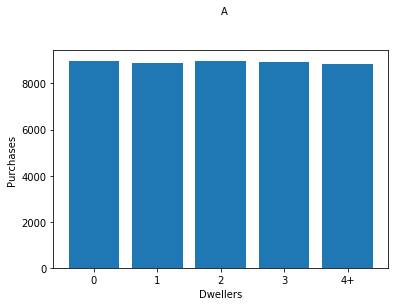

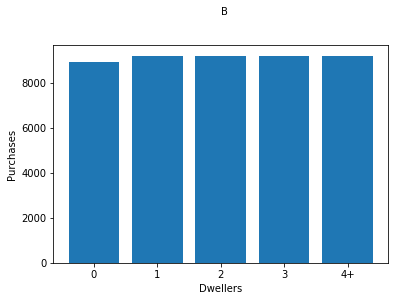

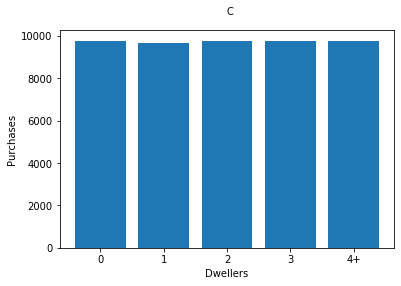

In [24]:
product_per_city(Product_1,'Product 1')

The average purchase patterns for:Product 2


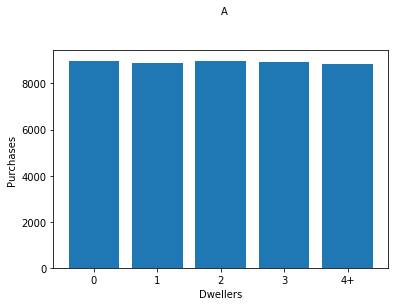

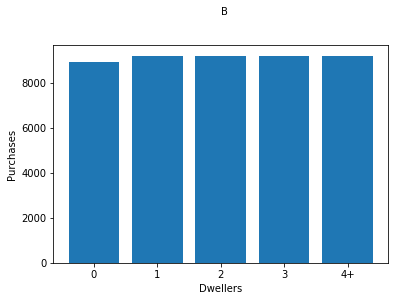

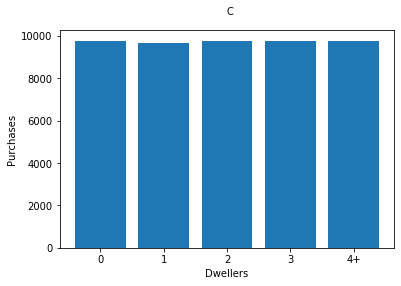

In [26]:
product_per_city(Product_2,'Product 2')

The average purchase patterns for:Product 3


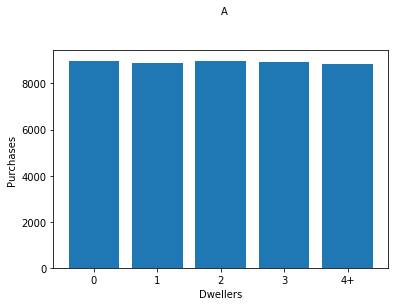

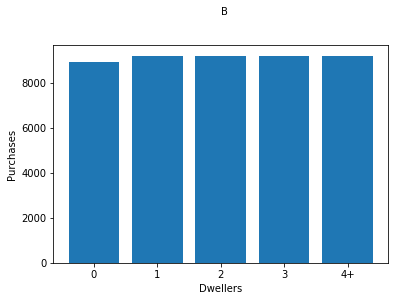

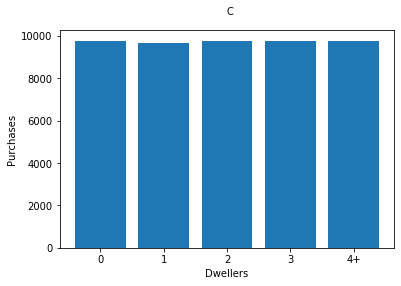

In [27]:
product_per_city(Product_3,'Product 3')

In [198]:
bins = ['0','1','2','3','4','5']
bin_1 = ['1','2','3','4','5']

train['Stay_n_binned'] = pd.cut(train['Stay_In_Current_City_Years'], bins, labels = bin_1, include_lowest= True)
train['Stay_n_binned']=train['Stay_n_binned'].cat.codes
train[['Stay_n_binned','Stay_In_Current_City_Years']].head()

,Stay_n_binned,Stay_In_Current_City_Years
0,1,2
1,1,2
2,1,2
3,1,2
4,4,4+


In [37]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
class measure_metrics_visualisation(Plotpolly):
    def poly_product(name_of_product,t):
        CG = name_of_product.groupby(['City_Category'])
#         def PlotPolly(model, independent_variable, dependent_variabble, Name,fg):
#             x_new = np.linspace(0, 20, 100)
#             y_new = model(x_new)

#             plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
#             plt.title('Polynomial Fit for Dwellers ~ Purchase for City '+fg)
#             ax = plt.gca()
#             ax.set_facecolor((0.898, 0.898, 0.898))
#             fig = plt.gcf()
#             plt.xlabel(Name)
#             plt.ylabel('Purchase')

#             plt.show()
#             plt.close()
        print('Conducting polynomial regression on :'+t)
        args=['A','B','C']
        for fg in args:
            CG1 = CG.get_group(fg)
            x=CG1['Occupation']
            y=CG1['Purchase']
            f = np.polyfit(x, y, 2)
            P = np.poly1d(f)
            print(P)
        
            Plotpolly.PlotPolly(P,x,y,'Stay_In_Current_City_Years')
        
            r_squared = r2_score(y, P(x))
            print('The R-square value for degree 2 is: ', r_squared)
            MSE=mean_squared_error(CG1['Purchase'], P(x))
            print('MSE :',MSE)

# # def poly_product(name_of_product,t,r):
# #     CG = name_of_product.groupby(['City_Category'])
# #     print('Conducting polynomial regression on :'+t)
# #     args=['A','B','C']
# #     for fg in args:
# #         CG1 = CG.get_group(fg)
# #         x=CG1['Occupation']
# #         y=CG1['Purchase']
# #         f = np.polyfit(x, y, r)
# #         P = np.poly1d(f)
# #         print(P)
        
# #         r_squared = r2_score(y, P(x))
# #         print('The R-square value for degree'+str(r)+' is: ', r_squared)
# #         MSE=np.square(np.subtract(,Y_pred)).mean() 
# #         print('MSE :',MSE)

Conducting polynomial regression on :Product 1
        2
-5.744 x + 116.3 x + 8612


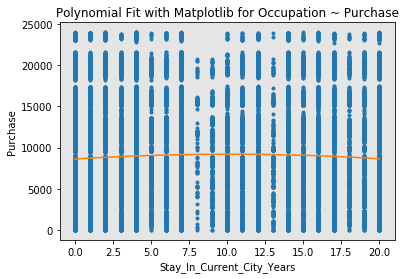

The R-square value for degree 2 is:  0.0016543836572874282
MSE : 23893035.73643863
        2
-2.712 x + 71.53 x + 8868


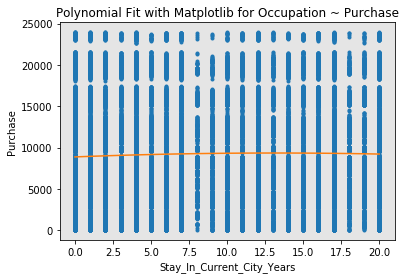

The R-square value for degree 2 is:  0.0010737217047335212
MSE : 24530472.779769912
        2
-3.071 x + 69.94 x + 9474


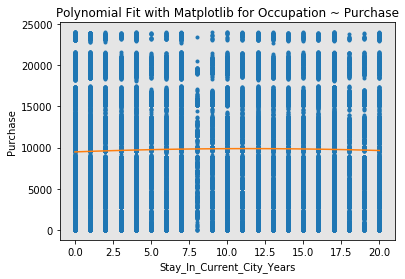

The R-square value for degree 2 is:  0.0006542673711263935
MSE : 26912771.238934897


In [38]:
measure_metrics_visualisation.poly_product(Product_1,'Product 1')